In [2]:
import pandas as pd
df=pd.read_csv("spam.csv",encoding="latin1")
df = df.dropna(axis=1)
df

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
ham_spam=df.Class.value_counts()
ham_spam

Class
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
df["label"]=df.Class.map({"ham":0,"spam":1})

In [5]:
df.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X=df.sms
y=df.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
X_train.head()

710     Height of Confidence: All the Aeronautics prof...
3740                                        2/2 146tf150p
2711    Wen ur lovable bcums angry wid u, dnt take it ...
3155                    Long time. You remember me today.
3748    Dear Voucher Holder 2 claim your 1st class air...
Name: sms, dtype: object

In [9]:
y_train.head()

710     0
3740    1
2711    0
3155    0
3748    1
Name: label, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english")

In [11]:
vect.fit(X_train)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [12]:
vect.vocabulary_

{'height': 3185,
 'confidence': 1844,
 'aeronautics': 799,
 'professors': 5083,
 'wer': 6971,
 'calld': 1511,
 'amp': 895,
 'askd': 1021,
 'sit': 5790,
 'aeroplane': 800,
 'aftr': 815,
 'sat': 5533,
 'told': 6506,
 'dat': 2058,
 'plane': 4891,
 'ws': 7115,
 'students': 6127,
 'dey': 2161,
 'hurried': 3340,
 'bt': 1443,
 'didnt': 2179,
 'said': 5505,
 '146tf150p': 290,
 'wen': 6966,
 'ur': 6724,
 'lovable': 3976,
 'bcums': 1193,
 'angry': 908,
 'wid': 7004,
 'dnt': 2246,
 'seriously': 5642,
 'coz': 1932,
 'childish': 1680,
 'true': 6592,
 'way': 6922,
 'showing': 5737,
 'deep': 2097,
 'affection': 804,
 'care': 1554,
 'luv': 4014,
 'kettoda': 3682,
 'manda': 4083,
 'nice': 4485,
 'day': 2066,
 'da': 2029,
 'long': 3945,
 'time': 6464,
 'remember': 5316,
 'today': 6498,
 'dear': 2076,
 'voucher': 6841,
 'holder': 3254,
 'claim': 1717,
 '1st': 325,
 'class': 1724,
 'airport': 843,
 'lounge': 3973,
 'passes': 4769,
 'using': 6747,
 'holiday': 3256,
 '08704439680': 83,
 'booking': 1339,
 'q

In [13]:
len(vect.vocabulary_.keys())

7233

In [14]:
X_train_transformed=vect.transform(X_train)
X_test_transformed=vect.transform(X_test)

In [15]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 32641 stored elements and shape (4179, 7233)>
  Coords	Values
  (0, 799)	1
  (0, 800)	1
  (0, 815)	1
  (0, 895)	1
  (0, 1021)	1
  (0, 1443)	1
  (0, 1511)	1
  (0, 1844)	1
  (0, 2058)	1
  (0, 2161)	1
  (0, 2179)	1
  (0, 3185)	1
  (0, 3340)	1
  (0, 4891)	2
  (0, 5083)	1
  (0, 5505)	1
  (0, 5533)	1
  (0, 5790)	1
  (0, 6127)	2
  (0, 6506)	1
  (0, 6971)	3
  (0, 7115)	1
  (1, 290)	1
  (2, 804)	1
  (2, 908)	2
  :	:
  (4174, 1637)	1
  (4174, 3214)	1
  (4174, 3787)	1
  (4174, 5344)	1
  (4174, 5927)	1
  (4175, 1623)	1
  (4175, 2123)	1
  (4175, 3594)	1
  (4175, 3849)	1
  (4175, 4385)	1
  (4175, 4609)	2
  (4175, 4890)	1
  (4175, 7155)	1
  (4176, 3329)	1
  (4176, 4670)	1
  (4176, 4723)	1
  (4176, 6425)	1
  (4177, 1796)	1
  (4177, 3066)	1
  (4177, 3999)	1
  (4177, 4609)	1
  (4177, 5057)	1
  (4177, 6721)	1
  (4178, 1644)	1
  (4178, 5864)	1


In [17]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train_transformed,y_train)
y_pred_class=mnb.predict(X_test_transformed)
y_pred_proba=mnb.predict_proba(X_test_transformed)

In [19]:
mnb

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [21]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.9892318736539842

In [23]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[1208,    5],
       [  10,  170]])

In [30]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

[[1208    5]
 [  10  170]]


In [31]:
sensitivity=TP/float(FN+TP)
print("sensitivity",sensitivity)

sensitivity 0.9444444444444444


In [33]:
specificity=TN/float(TP+FP)
print("specificity",specificity)

specificity 6.902857142857143


In [36]:
precision=TP/float(TP+FP)
print("precision",precision)
print(metrics.precision_score(y_test,y_pred_class))

precision 0.9714285714285714
0.9714285714285714


In [38]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test,y_pred_class))
print("RECALL SCORE",metrics.recall_score(y_test,y_pred_class))
print("F1 SCORE",metrics.f1_score(y_test,y_pred_class))

precision 0.9714285714285714
PRECISION SCORE : 0.9714285714285714
RECALL SCORE 0.9444444444444444
F1 SCORE 0.9577464788732394


In [39]:
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], shape=(1393,))

In [40]:
y_pred_proba

array([[9.82620579e-01, 1.73794211e-02],
       [9.96851420e-01, 3.14857954e-03],
       [9.97617329e-01, 2.38267096e-03],
       ...,
       [9.99531899e-01, 4.68101278e-04],
       [9.99383564e-01, 6.16435987e-04],
       [9.98256818e-01, 1.74318187e-03]], shape=(1393, 2))

In [41]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_proba[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

In [44]:
print(roc_auc)

0.9889621690940734


In [45]:
pd.DataFrame({"Threshold":thresholds,
              "TPR":true_positive_rate,
              "FPR":false_positive_rate
              })

,Threshold,TPR,FPR
0,inf,0.000000,0.000000
1,1.000000e+00,0.294444,0.000000
2,1.000000e+00,0.350000,0.000000
3,1.000000e+00,0.355556,0.000000
4,1.000000e+00,0.372222,0.000000
...,...,...,...
119,4.586805e-15,1.000000,0.985985
120,4.130879e-15,1.000000,0.987634
121,2.150415e-23,1.000000,0.995878
122,3.422251e-33,1.000000,0.999176


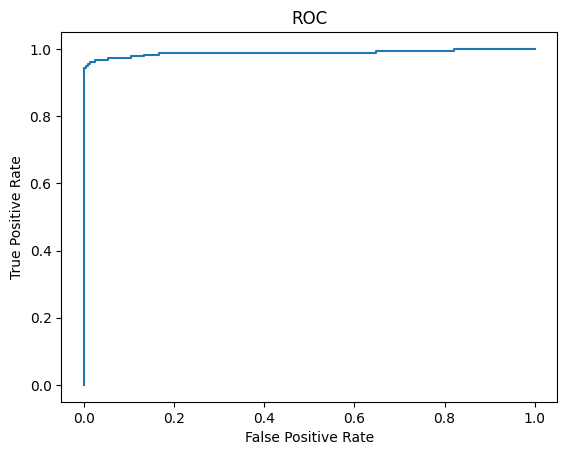

In [46]:
%matplotlib inline
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC")
plt.plot(false_positive_rate,true_positive_rate)